In [1]:
# The data has one file SynchronousMachine.csv
# Description
# I_y: Load Current
# PF: Power factor
# e_PF: Power factor error
# d_if: Changing of excitation current of synchronous machine
# I_f: Excitation current of synchronous machine

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import os
os.getcwd()

'C:\\Users\\Chinmaya\\IVY Python ML-Oct 2022'

In [4]:
import pandas as pd
import numpy as np

In [5]:
# Reading the dataset
SynchronousMachine=pd.read_csv('C:/Users/Chinmaya/IVY Python ML-Oct 2022/SynchronousMachine.csv',encoding='latin')
print('Shape before deleting duplicate columns',SynchronousMachine.shape)

Shape before deleting duplicate columns (557, 5)


In [6]:
# Removing the duplicate rows if any
SynchronousMachine=SynchronousMachine.drop_duplicates()
print('Shape before deleting duplicate columns',SynchronousMachine.shape)

Shape before deleting duplicate columns (557, 5)


In [7]:
# Renaming the columns
# inplace=True--> permanently replace the columns with new names
SynchronousMachine.rename(columns = {'I_y':'Load_Current', 'PF':'Power_Factor','e_PF':'Power_Factor_Error',
                                     'd_if':'Excitation_Current_Change','I_f':'Excitation_Current'},inplace = True)

In [8]:
# Printing the sample data
SynchronousMachine.head(10)

,Load_Current,Power_Factor,Power_Factor_Error,Excitation_Current_Change,Excitation_Current
0,3.0,0.66,0.34,0.383,1.563
1,3.0,0.68,0.32,0.372,1.552
2,3.0,0.70,0.30,0.360,1.540
3,3.0,0.72,0.28,0.338,1.518
4,3.0,0.74,0.26,0.317,1.497
5,3.0,0.76,0.24,0.301,1.481
6,3.0,0.78,0.22,0.290,1.470
7,3.0,0.80,0.20,0.280,1.460
8,3.0,0.82,0.18,0.250,1.430
9,3.0,0.84,0.16,0.221,1.401


In [9]:
# Creating the model
# Target variable: L_f-->Estimate excitation current
# Predictors: 
# I_y: Load Current
# PF: Power factor
# e_PF: Power factor error
# d_if: Changing of excitation current of synchronous machine

In [10]:
# Based on the problem statement we need to create a supervised ML Regression model, as the target variable is continuous

In [11]:
# Looking at the distribution of target variable
# If target variable is too skewed then the predictive modelling is not possible
# Bell curve is desirable but slightely positiveskew/negative skew is also fine
# When performing regression, make sure the histogram looks like a bell curve or slight skewed version of it.
# Otherwise it impacts the ML algorithms ability to learn all the scenarios

<AxesSubplot:>

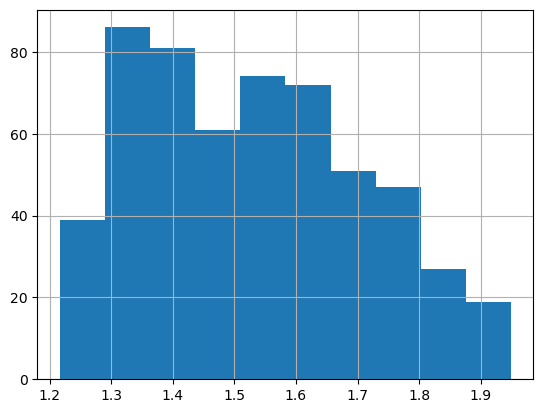

In [12]:
%matplotlib inline
# Creating bar charts of the variable is continuous
SynchronousMachine['Excitation_Current'].hist()

In [13]:
# The data distribution of the target variable is satisfactory to proceed further. There are sufficient number of rows

In [14]:
# Basic data exploration
# This step is performed in order to gauge the overall data, volume, types of columns
# Initial assessment of the data should be done to identiy which columns are Quantitative, Categorical or Qualitative

# It helps in select/reject the columns
# Better to question ourselves whether the column will affect the target variable or not?
# If answer is no, then better to skip the column

# 4 commands used for basic data exploration in Python
# head(): helps to see few sample rows of the data
# info(): provides summarized information of the data
# describe(): provides descriptive statistical details of the data
# nunique(): helpsus to identify if a columns is categorical/continuous

In [15]:
SynchronousMachine.head(10)

,Load_Current,Power_Factor,Power_Factor_Error,Excitation_Current_Change,Excitation_Current
0,3.0,0.66,0.34,0.383,1.563
1,3.0,0.68,0.32,0.372,1.552
2,3.0,0.70,0.30,0.360,1.540
3,3.0,0.72,0.28,0.338,1.518
4,3.0,0.74,0.26,0.317,1.497
5,3.0,0.76,0.24,0.301,1.481
6,3.0,0.78,0.22,0.290,1.470
7,3.0,0.80,0.20,0.280,1.460
8,3.0,0.82,0.18,0.250,1.430
9,3.0,0.84,0.16,0.221,1.401


In [16]:
SynchronousMachine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 557 entries, 0 to 556
Data columns (total 5 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Load_Current               557 non-null    float64
 1   Power_Factor               557 non-null    float64
 2   Power_Factor_Error         557 non-null    float64
 3   Excitation_Current_Change  557 non-null    float64
 4   Excitation_Current         557 non-null    float64
dtypes: float64(5)
memory usage: 26.1 KB


In [17]:
# Looking at the dscrptive statistics of data
SynchronousMachine.describe(include='all')

,Load_Current,Power_Factor,Power_Factor_Error,Excitation_Current_Change,Excitation_Current
count,557.000000,557.000000,557.000000,557.000000,557.000000
mean,4.499820,0.825296,0.174704,0.350659,1.530659
std,0.896024,0.103925,0.103925,0.180566,0.180566
min,3.000000,0.650000,0.000000,0.037000,1.217000
25%,3.700000,0.740000,0.080000,0.189000,1.369000
50%,4.500000,0.820000,0.180000,0.345000,1.525000
75%,5.300000,0.920000,0.260000,0.486000,1.666000
max,6.000000,1.000000,0.350000,0.769000,1.949000


In [18]:
# Fetching unique values for each column
# To undersand which column is categorical/continuous
SynchronousMachine.nunique()

Load_Current                  31
Power_Factor                  36
Power_Factor_Error            36
Excitation_Current_Change    306
Excitation_Current           306
dtype: int64

In [19]:
# Basic Data Exploration Results
# Load_Current: Continuous-->Selected
# Power_Factor: Continuous-->Selected
# Power_Factor_Error: Continuous-->Selected
# Excitation_Current_Change: Continuous-->Selected
# Excitation_Current: Continuous-->Selected

In [20]:
# Removing useless columns
# There are no qualitative columns in this data

In [21]:
# Visual Exploratory Data analysis
# Category variables: Bar plots
# Continuous variables: Histograms

In [22]:
# Visualize distribution of all the categorical predictor variables in the data using bar plots
# By looking the data, typically a categorical variable contains 20 unique values
# Currently we don't have any categorical variable

In [23]:
# Visualize distribution of all the continuous predictor variables in the data using histograms

array([[<AxesSubplot:title={'center':'Load_Current'}>,
        <AxesSubplot:title={'center':'Power_Factor'}>],
       [<AxesSubplot:title={'center':'Power_Factor_Error'}>,
        <AxesSubplot:title={'center':'Excitation_Current_Change'}>]],
      dtype=object)

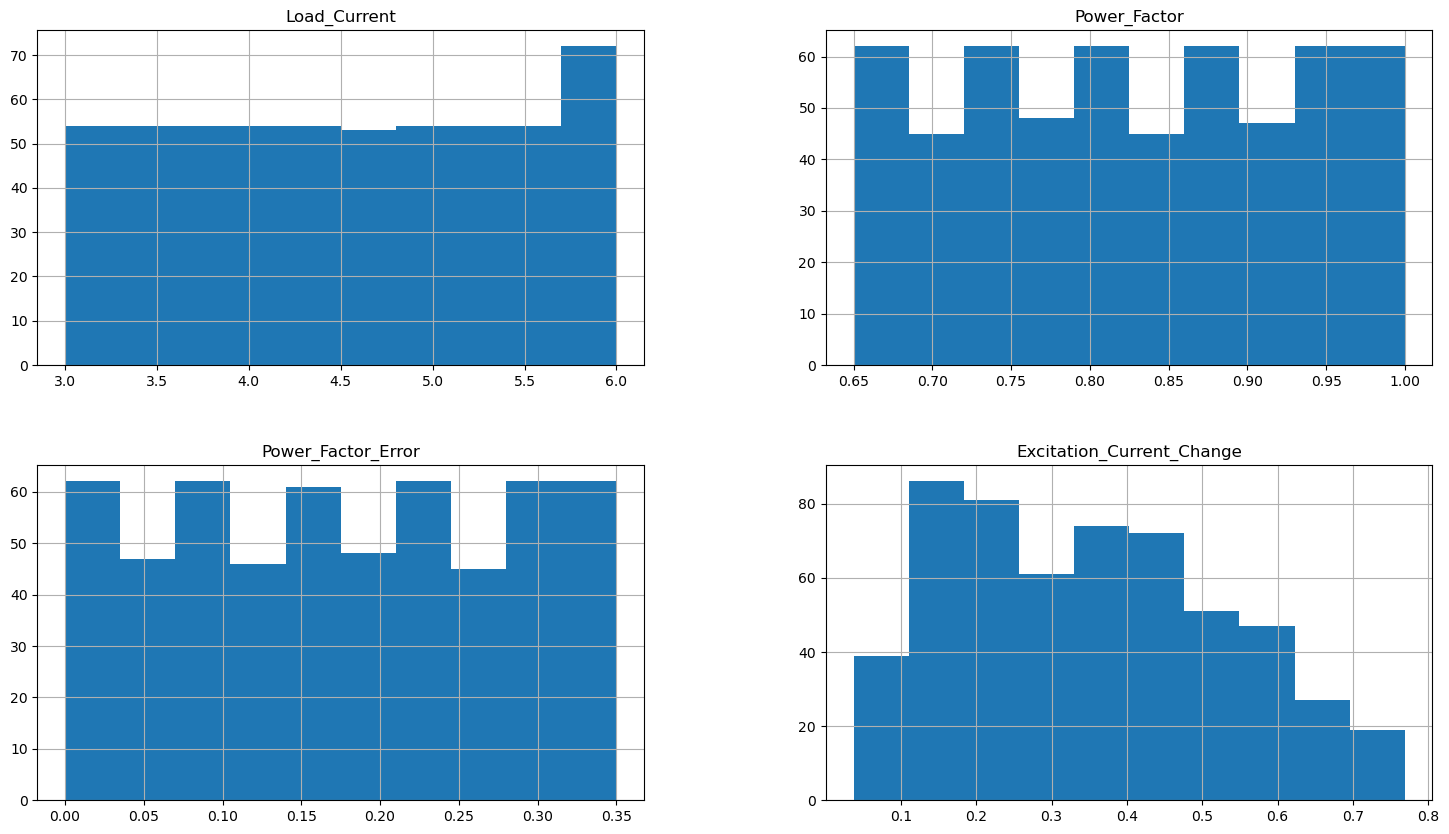

In [24]:
# Plotting histograms of multiple columns together
SynchronousMachine.hist(['Load_Current', 'Power_Factor', 'Power_Factor_Error', 'Excitation_Current_Change'], figsize=(18,10))

In [25]:
# Histogram Interpretation
# Histogram interpretation shows us the data distribution for a single continuous variable
# X-axis shows the range of values and Y-axis represent the number of values in that range
# The ideal outcome for histogram is a bell curve or slightely skewed bell curve. If there is too much skewness,
# then outlier treatment should be done and then column should be re-examined or we need to reject the column

In [26]:
# Selected continuous variables
# Load_Current: Selected. The distribution is good.
# Power_Factor: Selected. The distribution is good.
# Power_Factor_Error: Selected. The distribution is good.
# Excitation_Current_Change: Selected. The distribution is good.

In [27]:
# Outlier treatment
# Outliers are extreme values in the data which are far away from most of the values. If you notice them as the tail of histogram
# Outliers must be treated one column at a time.As the treatment will be slightly different for each column

# Why I should treat outliers?

# Outliers bias the machine learning models. As the algorithm tries to fit the extreme value, it goes away from majority
# of the data
# Here we don't find any of the values at the extremes, so we will ignore treating columns for outliers

In [28]:
# Missing values treatment
# Missing values are treated for each column separately
# If a column has more than 30% of the data missing, then missing value treatment can't be done
# The column must be rejected because too much information is missing

# There are below options for treating missing values in data
# - Interpolate the values based on the business logic
# - Impute the missing values with MEDIAN value for continuous variables
# - Impute the missing values with MODE values for categorical variables
# - Interpolate the values based on the nearby value
# - Delete the missing value rows if few records only available

Load_Current                 0
Power_Factor                 0
Power_Factor_Error           0
Excitation_Current_Change    0
Excitation_Current           0
dtype: int64


<AxesSubplot:>

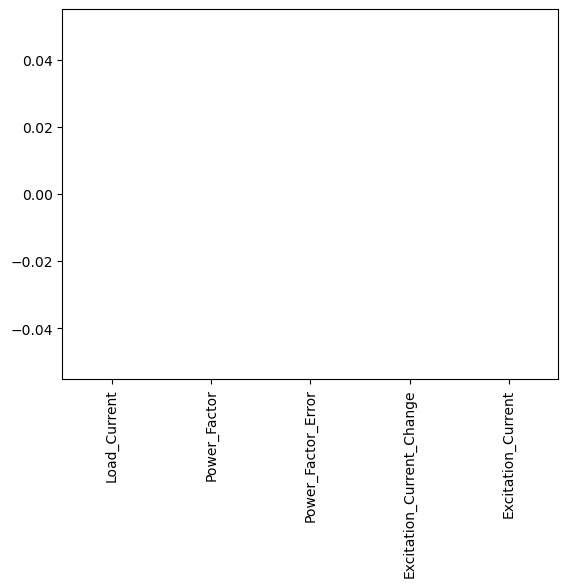

In [29]:
# Finding how many missing values are there for each column
print(SynchronousMachine.isnull().sum())
SynchronousMachine.isnull().sum().plot(kind='bar')

In [30]:
# Since there are no missing values in any of the column so there is no need to treat any column

In [31]:
# Feature Selection (Bi-Variate analysis)
# Now its time to finally choose the best columns(Features) which are correlated to the Target variable
# This can be done directly by measuring the correlation values or ANOVA/Chi-Square tests
# However, it is always helpful to visualize the relation between the Target variable and each of the predictors to get
# a better sense of data

# I have listed below the techniques used for visualizing relationship between two variables as well as measuring
# the strength statistically

In [32]:
# Visual exploration of relationship between variables
# - Continuous Vs Continuous ---- Scatter Plot
# - Categorical Vs Continuous---- Box Plot
# - Categorical Vs Categorical---- Grouped Bar Plots

# Statistical measurement of relationship strength between variables
# - Continuous Vs Continuous ---- Correlation matrix
# - Continuous Vs Continuous ---- Correlation matrix
# - Categorical Vs Categorical--- Chi-Square test

# In this case study, target variable is continuous, hence below 2 scenarios will be present
# - Continuous Target Variable Vs Continuous Predictor
# - Continuous Target Variable Vs Categorical Predictor

In [33]:
# Relationship exploration: Continuous Vs Continuous -- Scatter Charts
# When the Target variable is continuous and the predictor is also continuous, we can visualize the relationship
# between the two variables using scatter plot and measure the strength of relation using pearson's correlation value

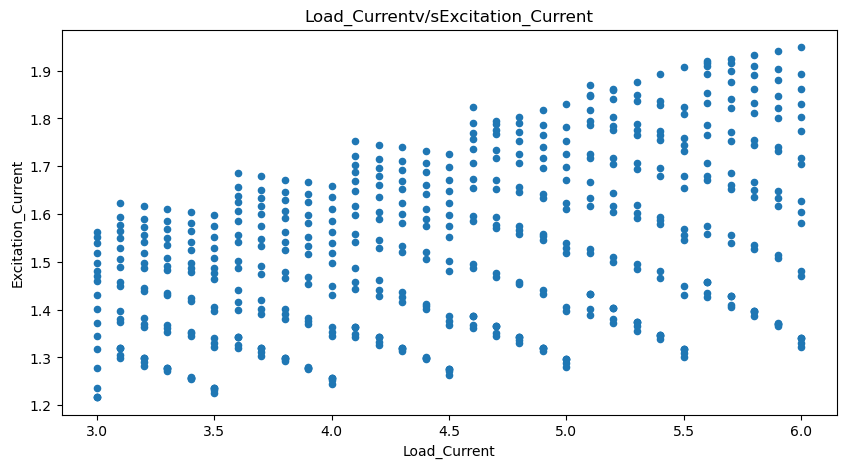

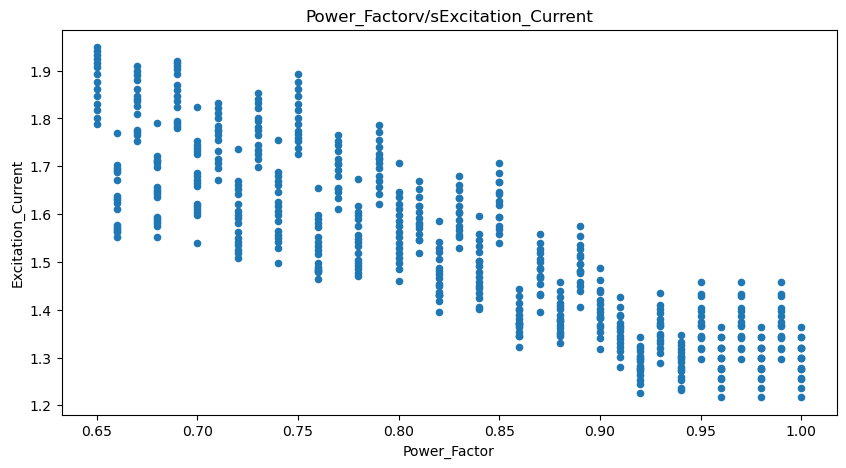

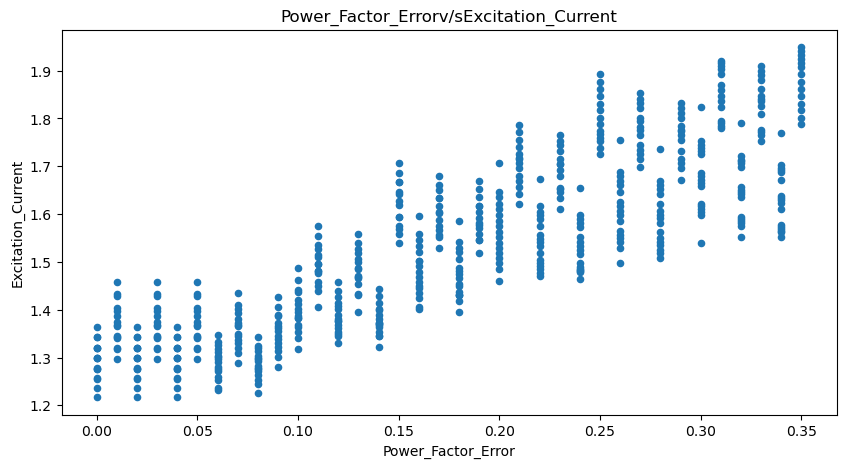

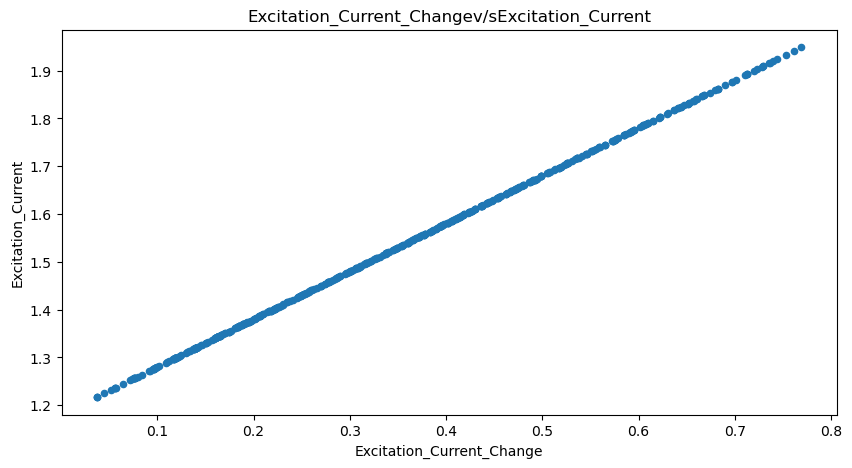

In [34]:
ContinuousCols=['Load_Current','Power_Factor','Power_Factor_Error','Excitation_Current_Change']

# Plotting scatter chart for each predictor vs the target variable
for predictor in ContinuousCols:
    SynchronousMachine.plot.scatter(x=predictor, y='Excitation_Current', figsize=(10,5), title=predictor+'v/s'+'Excitation_Current')

In [35]:
# Scatter chart interpretation
# What should you look in these scatter charts?
# Trend..We need to try to see if there is a visible trend or not. There could be 3 scenarios

# - Increasing Trend: This means both variables are positively correlated. In simpler terms,
# they are directly proportional to each other
# - Decreasing Trend: This means both variables are negatively correlated. In simpler terms,
# they are inversely proportional to each other, if one value increases, other decreases. This is also good for ML!
# - No Trend: You cannot see any clear increasing or decreasing trend. This means there is no correlation
# between the variables. Hence the predictor cannot be used for ML.

# Based on this chart you can get a good idea about the predictor, if it will be useful or not.
# You confirm this by looking at the correlation value.

In [36]:
# Statistical feature selection:
# This value will be calulated only between numeric columns
# Correlation between [-1,0] means inversely proportional, the scatter plot will show downward trend
# Correlation between (0,1] means directly proportional, the scatter plot will show a upward trend
# Correlation near [0] means No relationship, the scatter plot will show no clear trend
# If Correlation value between two variables is > 0.5 in magnitude, it indicates good relationship the sign does not matter
# We observe the correlations between Target variable and all other predictor variables(s) to check which 
# columns/features/predictors are actually related to the target variable in question

In [37]:
# Calculatin correlation matrix
ContinuousCols=['Excitation_Current','Load_Current','Power_Factor','Power_Factor_Error','Excitation_Current_Change']

# Creating the correlation matrix
CorrelationData=SynchronousMachine[ContinuousCols].corr()
CorrelationData

,Excitation_Current,Load_Current,Power_Factor,Power_Factor_Error,Excitation_Current_Change
Excitation_Current,1.000000,0.424945,-0.861013,0.861013,1.000000
Load_Current,0.424945,1.000000,-0.041574,0.041574,0.424945
Power_Factor,-0.861013,-0.041574,1.000000,-1.000000,-0.861013
Power_Factor_Error,0.861013,0.041574,-1.000000,1.000000,0.861013
Excitation_Current_Change,1.000000,0.424945,-0.861013,0.861013,1.000000


In [38]:
# Filtering only those columns where absolute correlation > 0.5 with Target Variable
# reduce the 0.5 threshold if no variable is selected
CorrelationData['Excitation_Current'][abs(CorrelationData['Excitation_Current']) > 0.5]

Excitation_Current           1.000000
Power_Factor                -0.861013
Power_Factor_Error           0.861013
Excitation_Current_Change    1.000000
Name: Excitation_Current, dtype: float64

In [39]:
# Final selected continuous columns:
# 'Load_Current','Power_Factor','Power_Factor_Error','Excitation_Current_Change
abs(CorrelationData['Excitation_Current'])>0.5

Excitation_Current            True
Load_Current                 False
Power_Factor                  True
Power_Factor_Error            True
Excitation_Current_Change     True
Name: Excitation_Current, dtype: bool

In [40]:
# Selecting Final Predictors for Machine Learning
# Based on above tests, selecting final columns for machine learning

In [41]:
SelectedColumns=['Load_Current','Power_Factor','Power_Factor_Error','Excitation_Current_Change']

# Selecting final columns
DataForML=SynchronousMachine[SelectedColumns]
DataForML.head()

,Load_Current,Power_Factor,Power_Factor_Error,Excitation_Current_Change
0,3.0,0.66,0.34,0.383
1,3.0,0.68,0.32,0.372
2,3.0,0.70,0.30,0.360
3,3.0,0.72,0.28,0.338
4,3.0,0.74,0.26,0.317


In [42]:
# Saving this final data for reference during deployment
DataForML.to_pickle('DataForML.pkl')

In [43]:
import pandas as pd
DataForML=pd.read_pickle('DataForML.pkl')
DataForML.head()

,Load_Current,Power_Factor,Power_Factor_Error,Excitation_Current_Change
0,3.0,0.66,0.34,0.383
1,3.0,0.68,0.32,0.372
2,3.0,0.70,0.30,0.360
3,3.0,0.72,0.28,0.338
4,3.0,0.74,0.26,0.317


In [44]:
# Data Pre-processing for Machine Learning
# List of steps performed on predictor variables before data can be used for Machine learning

# 1. Converting each Ordical Categorical columns to numeric
# 2. Converting Binary nominal Categorical columns to numeric using 1/0 mapping
# 3. Converting all other nominal categorical columns to numeric using pd.get_dummies()
# 4. Data Transformation (Optional): Standardization/Normalization/log/sqrt. Important if you are using distance based algorithms
# like KNN, or Neural Networks

# In this data there is no Ordinal categorical variable which is in string format.

In [45]:
# Converting binary nominal variable to numeric using / mapping
# There is no binary nominal variable in string format to be converted

In [46]:
# Converting the nominal variable to numeric using get_dummies()

In [47]:
# Treating all the nominal variables at once using dummy variables
DataForML_Numeric=pd.get_dummies(DataForML)

# Adding Target variable to the data
DataForML_Numeric['Excitation_Current']=SynchronousMachine['Excitation_Current']

# Printing sample rows
DataForML_Numeric.head(20)

,Load_Current,Power_Factor,Power_Factor_Error,Excitation_Current_Change,Excitation_Current
0,3.0,0.66,0.34,0.383,1.563
1,3.0,0.68,0.32,0.372,1.552
2,3.0,0.70,0.30,0.360,1.540
3,3.0,0.72,0.28,0.338,1.518
4,3.0,0.74,0.26,0.317,1.497
5,3.0,0.76,0.24,0.301,1.481
6,3.0,0.78,0.22,0.290,1.470
7,3.0,0.80,0.20,0.280,1.460
8,3.0,0.82,0.18,0.250,1.430
9,3.0,0.84,0.16,0.221,1.401


In [48]:
# Machine learning: Splitting the data into Training & Testing sample
# We don't uses full data for creating the model. Some data is randomly selected and kept aside for checking how good the model is.
# This is known as Testing dataand the remaining data is called Training data on which the model is built.
# Typically 70% of the data is used as Training data and the rest 30% is used as Testing data.

In [49]:
# Printing all the names for our references

In [50]:
DataForML_Numeric.columns

Index(['Load_Current', 'Power_Factor', 'Power_Factor_Error',
       'Excitation_Current_Change', 'Excitation_Current'],
      dtype='object')

In [51]:
# Separate Target variable and Predictors
TargetVariable='Excitation_Current'
Predictors=['Load_Current','Power_Factor','Power_Factor_Error','Excitation_Current_Change']

# Simple Linear Regression (only one predictor)

X=DataForML_Numeric[Predictors].values
y=DataForML_Numeric[TargetVariable].values

# Split the data into training and testing set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=31)

# Quick check on the shape of train and test
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(389, 4)
(389,)
(168, 4)
(168,)


In [52]:
# Suppressing sientific notation in printing numpy arrays
np.set_printoptions(suppress=True)
X_train[0:10]

array([[4.   , 0.68 , 0.32 , 0.455],
       [4.5  , 0.74 , 0.26 , 0.467],
       [5.6  , 0.75 , 0.25 , 0.713],
       [5.3  , 0.89 , 0.11 , 0.315],
       [5.8  , 0.83 , 0.17 , 0.471],
       [3.   , 0.96 , 0.04 , 0.037],
       [5.1  , 0.83 , 0.17 , 0.454],
       [3.7  , 0.98 , 0.02 , 0.14 ],
       [3.3  , 0.7  , 0.3  , 0.43 ],
       [5.7  , 0.85 , 0.15 , 0.506]])

In [53]:
y_train[0:10]

array([1.635, 1.647, 1.893, 1.495, 1.651, 1.217, 1.634, 1.32 , 1.61 ,
       1.686])

In [55]:
# Multiple Linear Regression

In [62]:
from sklearn.linear_model import LinearRegression
RegModel = LinearRegression()

# Printing all the parameters of Linear Regression
print(RegModel)

# Creating the model on Training data
LREG = RegModel.fit(X_train,y_train)

# Taking the standardized values to original scale

from sklearn import metrics
# Measuring Goodness of fit in Trining data
print('R2 value',metrics.r2_score(y_train, LREG.predict(X_train)))

#######################################################################

print('\n##### Model Validation and Accuracy Calculations ######')

# Printing some sample values of prediction
prediction=LREG.predict(X_test)
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Calulating the error for each row
TestingDataResults['APE']=100 * ((abs(
    TestingDataResults['Excitation_Current']-TestingDataResults['PredictedExcitation_Current']))/TestingDataResults['Excitation_Current'])

# Printing sample prediction values
print(TestingDataResults[[TargetVariable,'Predicted'+TargetVariable, 'APE']].head())

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy=100 - MAPE
MedianAccuracy=100 - MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test daya:', MedianAccuracy)


# Defining the custom function to calculate accuracy
# Make sure that there are no zeroes in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70, 'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automaticaly choose train/test
Accuracy_Values=cross_val_score(RegModel, X, y, cv=5, scoring=custom_scoring)
print('\Accuracy values for 10-Fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

LinearRegression()
R2 value 1.0

##### Model Validation and Accuracy Calculations ######
   Excitation_Current  PredictedExcitation_Current        APE
0               1.575                          2.0  26.984127
1               1.685                          2.0  18.694362
2               1.656                          2.0  20.772947
3               1.318                          1.0  24.127466
4               1.450                          1.0  31.034483
Mean Accuracy on test data: 76.50074193217375
Median Accuracy on test daya: 75.4669504717484
\Accuracy values for 10-Fold Cross Validation:
 [100. 100. 100. 100. 100.]

Final Average Accuracy of the model: 100.0


In [63]:
import sklearn
sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_wei

In [65]:
TestingDataResults['Excitation_CurrentAVG']=TestingDataResults['Excitation_Current'].mean()
TestingDataResults.head()

,Load_Current,Power_Factor,Power_Factor_Error,Excitation_Current_Change,Excitation_Current,PredictedExcitation_Current,APE,Excitation_CurrentAVG
0,3.5,0.68,0.32,0.395,1.575,2.0,26.984127,1.514155
1,3.6,0.70,0.30,0.505,1.685,2.0,18.694362,1.514155
2,3.6,0.68,0.32,0.476,1.656,2.0,20.772947,1.514155
3,5.5,0.95,0.05,0.138,1.318,1.0,24.127466,1.514155
4,4.0,0.84,0.16,0.270,1.450,1.0,31.034483,1.514155


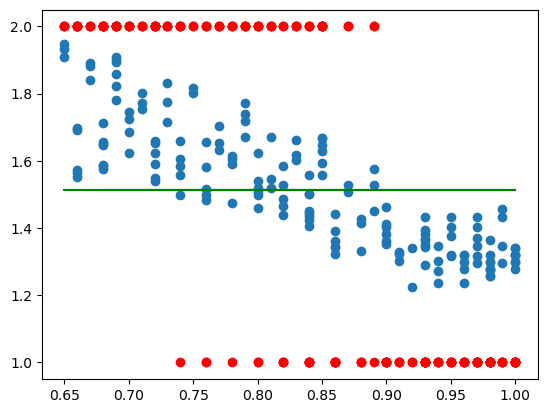

In [66]:
# Visualizing the line of best fit
%matplotlib inline
import matplotlib.pyplot as plt
plt.scatter(x=TestingDataResults['Power_Factor'], y=TestingDataResults['Excitation_Current'])
plt.scatter(TestingDataResults['Power_Factor'], TestingDataResults['PredictedExcitation_Current'], color='red')
plt.plot(TestingDataResults['Power_Factor'], TestingDataResults['Excitation_CurrentAVG'], color='green')

In [67]:
SelectedColumns=['Load_Current', 'Power_Factor', 'Power_Factor_Error', 'Excitation_Current_Change']

In [68]:
# Looking at the co-efficients for each column
LREG.coef_

array([-0.,  0., -0.,  1.])

In [69]:
# Looking at the intercept
LREG.intercept_

1.18

DecisionTreeRegressor(criterion='mse', max_depth=3)
R2 Value: 0.9797323810680609

##### Model Validation and Accuracy Calculation #######
   Excitation_Current  PredictedExcitation_Current
0               1.575                          2.0
1               1.685                          2.0
2               1.656                          2.0
3               1.318                          1.0
4               1.450                          1.0
Median Accuracy on test data: 76.45017303782848
Median Accuracy on test data: 75.4669504717484

Accuracy values for 10-Fold Cross validation:
 [98.51857336 98.11324643 98.38111293 98.56856814 98.70131426 98.75812267
 98.33095636 98.55432236 98.42597291 98.46013002]

Final Average Accuracy of the model: 98.48


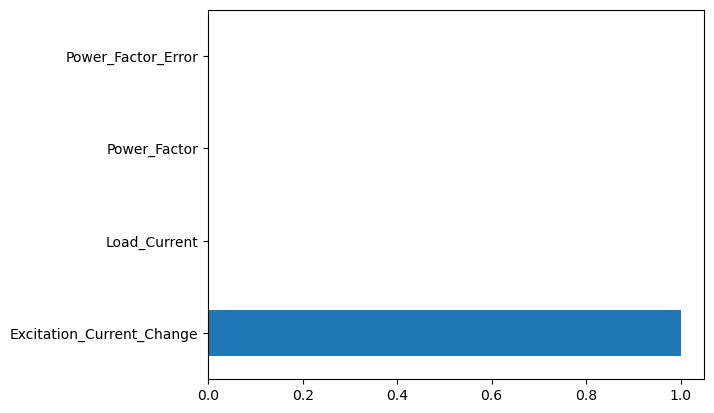

In [71]:
# Decision Trees
# Decision Trees (Multiple if-else statement)
from sklearn.tree import DecisionTreeRegressor
RegModel = DecisionTreeRegressor(max_depth=3, criterion='mse')
# Good range of hyper parameter Max_depth = 2 to 20

# Printing all the parameters of Decision Tree
print(RegModel)

# Creating the model on Training Data
DT=RegModel.fit(X_train, y_train)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:', metrics.r2_score(y_train, DT.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(DT.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

##################################################################################
print('\n##### Model Validation and Accuracy Calculation #######')
prediction=DT.predict(X_test)
# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults[[TargetVariable,'Predicted'+TargetVariable]].head())

# Calculating the error in each row
TestingDataResults['APE']=100 * ((abs(
    TestingDataResults['Excitation_Current']-TestingDataResults['PredictedExcitation_Current']))/TestingDataResults['Excitation_Current'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy = 100 - MAPE
MedianAccuracy = 100 - MedianMAPE
print('Median Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)


# Defining the custom function to calculate accuracy
# Make sure there are no zeroes in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X, y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-Fold Cross validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

In [82]:
# Plotting a Decision Tree
# Installing the required library for plotting the decision tree
# Make sure to run all three commands
# 1. Open anaconda Prompt / people with mac run on terminal
# pip install graphviz
# conda install graphviz
# pip install pydotplus

In [83]:
# Adding graphviz path to the PATH env variable
# Try to find "dot.exe" in your system and provide the path of that folder
import os
os.environ['PATH'] +=os.pathsep + 'C:/Users/Chinmaya/anaconda3/pkgs/graphviz-2.50.0-hdb8b0d4_0/Library/bin'

In [84]:
np.var(y_train)

0.032361406916422704

In [85]:
np.mean(y_train)

1.5377866323907454

digraph Tree {
node [shape=box, fontname="helvetica"] ;
edge [fontname="helvetica"] ;
0 [label="Excitation_Current_Change <= 0.363\nmse = 0.032\nsamples = 389\nvalue = 1.538"] ;
1 [label="Excitation_Current_Change <= 0.227\nmse = 0.007\nsamples = 203\nvalue = 1.392"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="Excitation_Current_Change <= 0.148\nmse = 0.002\nsamples = 122\nvalue = 1.332"] ;
1 -> 2 ;
3 [label="mse = 0.001\nsamples = 54\nvalue = 1.285"] ;
2 -> 3 ;
4 [label="mse = 0.0\nsamples = 68\nvalue = 1.369"] ;
2 -> 4 ;
5 [label="Excitation_Current_Change <= 0.296\nmse = 0.002\nsamples = 81\nvalue = 1.482"] ;
1 -> 5 ;
6 [label="mse = 0.0\nsamples = 34\nvalue = 1.443"] ;
5 -> 6 ;
7 [label="mse = 0.0\nsamples = 47\nvalue = 1.51"] ;
5 -> 7 ;
8 [label="Excitation_Current_Change <= 0.534\nmse = 0.011\nsamples = 186\nvalue = 1.697"] ;
0 -> 8 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;
9 [label="Excitation_Current_Change <= 0.447\nmse = 0.002\nsam

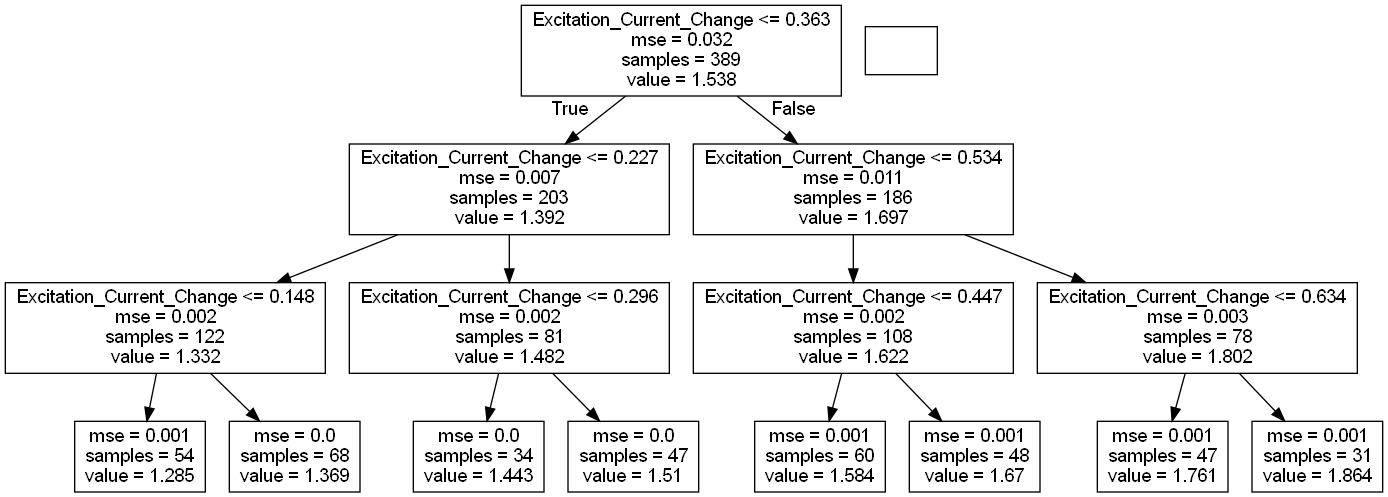

In [87]:
# Load libraries
from IPython.display import Image
from sklearn import tree
import pydotplus

# Creating DOT data
dot_data = tree.export_graphviz(RegModel, out_file=None,
                               feature_names=Predictors, class_names=TargetVariable)

# Printing the rules
print(dot_data)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)

# Show graph
Image(graph.create_png(), width=8000, height=8000)
# Double click on the graph to zoom in

In [89]:
# Saving the figure in current working directory
import matplotlib.pyplot as plt
currentFig=plt.gcf()
currentFig.savefig('DecisionTree.JPEG')

<Figure size 640x480 with 0 Axes>